# Introduction

In this Quiz #1 you need to perform exploratory data analysis (EDA) and preprocessing using "Census Income" dataset. The dataset is tabular data which has several missing value in some variables. Moreover, you may need to adjust the name of variables (if needed).

To guide you through this task, some code has beed provided including, download the data, loading the data, and metadata inspection.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Part 1 - Data Loading dan Data Imputation

## Task 1 (5 points)
1.   Do inspection to get the information about dataset
2.   **Which variable(s)** has **missing values**? **How many is it**?



In [ ]:
df.replace('?', np.nan, inplace=True)

missing_counts = df.isnull().sum()

variables_with_missing = missing_counts[missing_counts > 0]
print("\nVariables with missing values and their counts:")
print(variables_with_missing)


Variables with missing values and their counts:
workclass         2799
occupation        2809
native-country     857
dtype: int64


## Task 2 (5 points)
1. Perform data imputation on missing values.
2. Verified the missing values for each variable. Is it still there?

In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipython-input-2844041629.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## Task 3 (10 points)
Do inspection to all the quantitative variables (features). If you found an **inappropriate value(s)**, replace it with '**Others**'. Also, if you found any typos value(s), **fix the typos**.

In [ ]:
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", num_cols.tolist())
print("Categorical columns:", cat_cols.tolist())

Numeric columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


Based on the inspection of the quantitative variables, the values are appropriate numerical values, and no obvious typos were found. The instruction to replace inappropriate values with 'Others' is typically applicable to categorical variables. Therefore, no modifications were made to these quantitative columns.

# Part 2 - Visual Inspection



## Task 1 - Data Visualization (20 points)
Do inspection on this following variabels,
1. On the 'age' by using a histogram
2. On the 'education' using a barchart
3. On the 'income' to 'hours_per_week' by using a boxplot (grouped by income)
4. On the 'age' to 'capital-gain' and 'capital-loss' using lineplot (lineplot with multiple x-data)

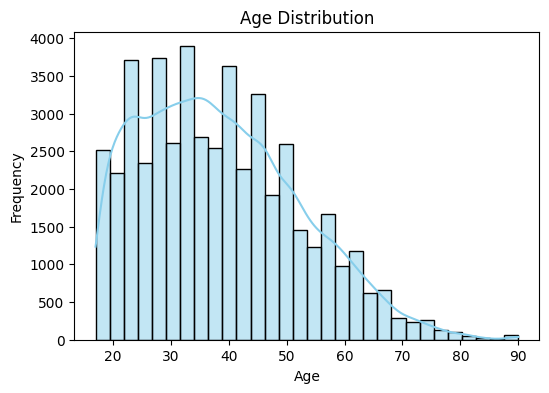

In [ ]:
# Answer 1.1 - Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=30, kde=True, color="skyblue")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

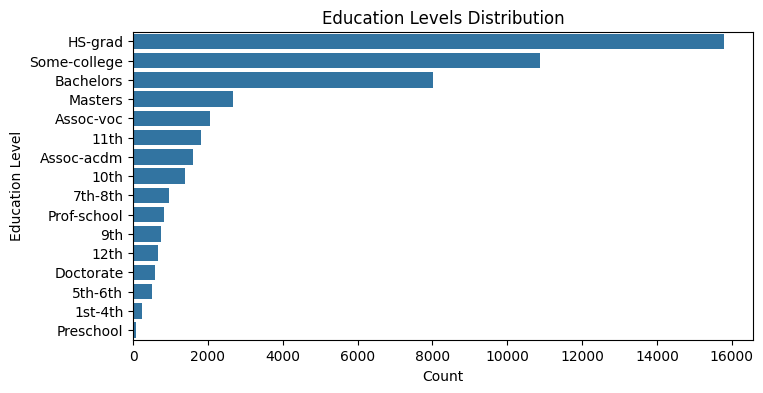

In [ ]:
# Answer 1.2 - Barchart
plt.figure(figsize=(8, 4))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Education Levels Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

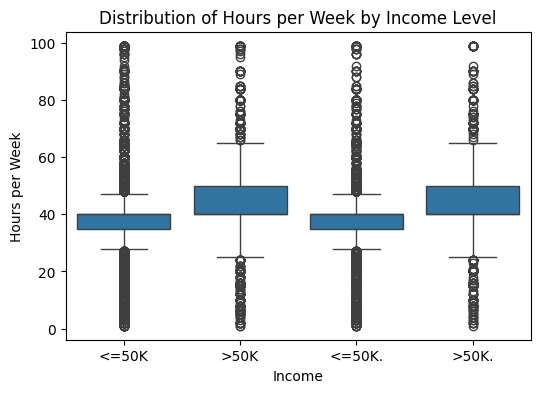

income
<=50K    11706
>50K       781
Name: hours-per-week, dtype: int64


In [ ]:
# Answer 1.3 - Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Distribution of Hours per Week by Income Level')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

def count_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((group < lower) | (group > upper)).sum()

df['income'] = df['income'].str.replace('.', '', regex=False).str.strip()

outliers_by_income = df.groupby('income')['hours-per-week'].apply(count_outliers)
print(outliers_by_income)

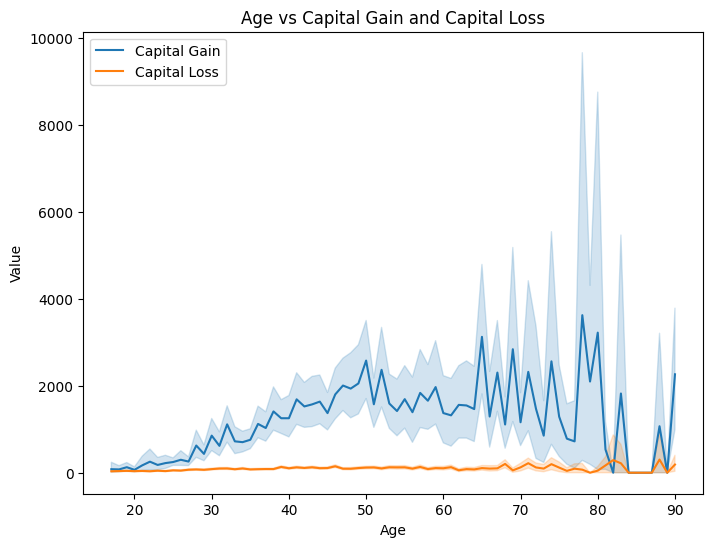

In [ ]:
# Answer 1.4 - Lineplot
plt.figure(figsize=(8, 6))
sns.lineplot(x='age', y='capital-gain', data=df, label='Capital Gain')
sns.lineplot(x='age', y='capital-loss', data=df, label='Capital Loss')
plt.title("Age vs Capital Gain and Capital Loss")
plt.xlabel("Age")
plt.ylabel("Value")
plt.legend()
plt.show()

## Task 2 - Visual Analysis (15 points)
1. What kind of distribution showed in 'age'?
2. If you find missing values in 'age', what kind of data impute method will you use? Why?
3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?

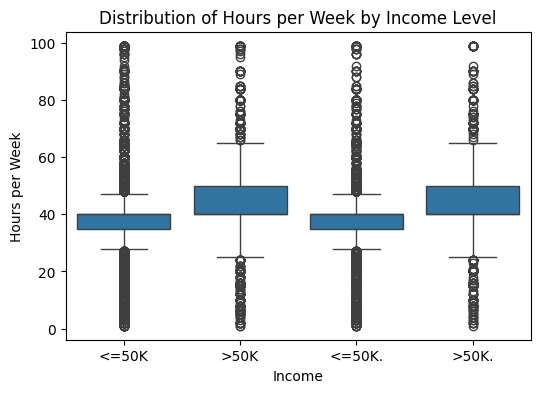

income
<=50K    11706
>50K       781
Name: hours-per-week, dtype: int64


In [ ]:
# Answer with python comment like this -> inline comment

# 1. What kind of distribution showed in 'age'?
# The distribution of 'age' appears to be right-skewed, with most people in the dataset between 20-50 years old.

# 2. If you find missing values in 'age', what kind of data impute method will you use? Why?
# Based on the previous inspection, there are no missing values in the 'age' column.
# However, if there were missing values, the imputation method could be using median due to the right-skewed distribution, as the median is less sensitive to outliers than the mean.

# 3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?
# Both groups (<=50K and >50K) have outliers in hours-per-week.
# The <=50K group has far more outliers than the >50K group.
# This means people earning less or equal to 50K show much more variation in working hours (some working very few or very many hours compared to the median).
# The >50K group still has outliers, but the count is relatively small.

# Part 3 - Encoding in Categorical Variable

## Task 1 (5 points)
Do encoding process on 'Sex' and 'Income', while 'Income' is target variable.

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()


df['sex'] = label_encoder.fit_transform(df['sex'].map({'Male': 0, 'Female': 1}))
df['income'] = label_encoder.fit_transform(df['income'].map({'<=50K': 0, '>50K': 1}))

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [ ]:
print(df[['sex', 'income']].head(10))

   sex  income
0    0       0
1    0       0
2    0       0
3    0       0
4    1       0
5    1       0
6    1       0
7    0       1
8    1       1
9    0       1


# Part 4 - Correlation Analysis

## Task 1 (10 points)
1. Do correlation analysis on the following variabels: 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', and 'income' (encoded version from previous task)
2. Based on the result, what kind of information you get?

,age,education-num,hours-per-week,capital-gain,capital-loss,income
age,1.000000,0.030940,0.071558,0.077229,0.056944,0.230369
education-num,0.030940,1.000000,0.143689,0.125146,0.080972,0.332613
hours-per-week,0.071558,0.143689,1.000000,0.082157,0.054467,0.227687
capital-gain,0.077229,0.125146,0.082157,1.000000,-0.031441,0.223013
capital-loss,0.056944,0.080972,0.054467,-0.031441,1.000000,0.147554
income,0.230369,0.332613,0.227687,0.223013,0.147554,1.000000


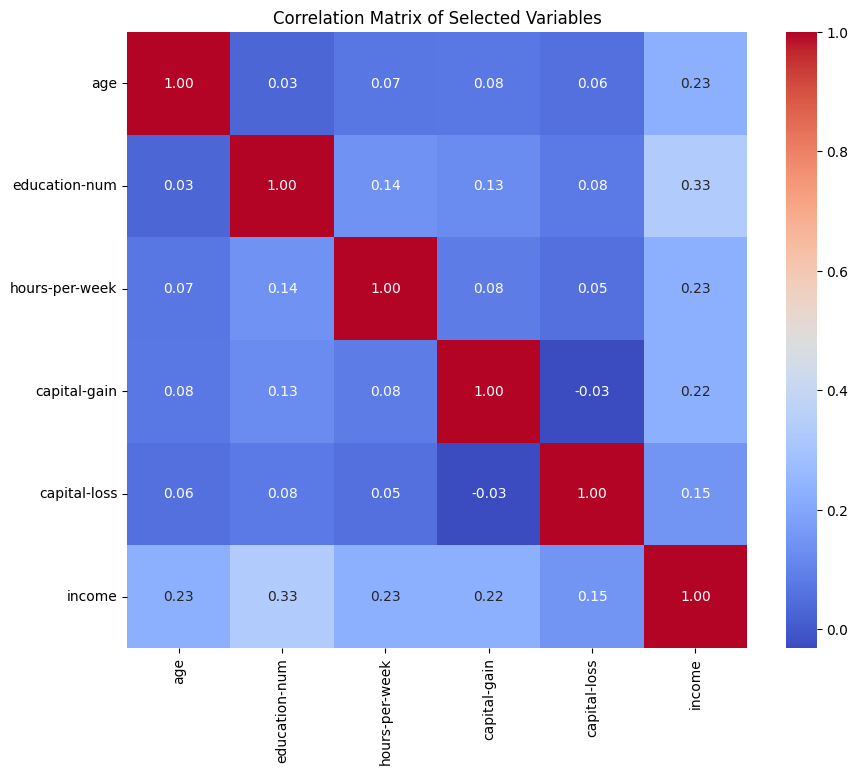

In [ ]:
# Answer task 1 - Correlation Analysis
correlation_vars = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']

# Calculate the correlation matrix
correlation_matrix = df[correlation_vars].corr()

# Display the correlation matrix
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [ ]:
'''
Based on the correlation matrix:
- 'income' has positive correlations with 'age', 'education-num', 'capital-gain', and 'hours-per-week'. This suggests that individuals who are older, have higher education levels, higher capital gains, and work more hours per week are more likely to have an income greater than 50K.
- 'income' has a negative correlation with 'capital-loss', indicating that individuals with higher capital losses are less likely to have an income greater than 50K.
- 'capital-gain' and 'capital-loss' have very low correlations with most other variables, and also with each other.
- 'education-num' and 'age' have a moderate positive correlation.
- 'hours-per-week' has a slight positive correlation with 'age' and 'education-num'.
Overall, 'capital-gain', 'education-num', and 'age' appear to have the strongest positive correlations with 'income' among the selected features.
...

# Part 5 - Preprocessing on MNIST Dataset

In this part, you need to perform EDA and simple preprocessing on MNIST dataset. This dataset contain images of handwritten digit from 0 to 9. A pre configuration is provided to help you to load the data and inspect some images.

Hints:
1. You only need to use the **Test** set.
2. You need to perform to all of images in test set (10k images). You may need a function to complete this task (optional).

In [ ]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


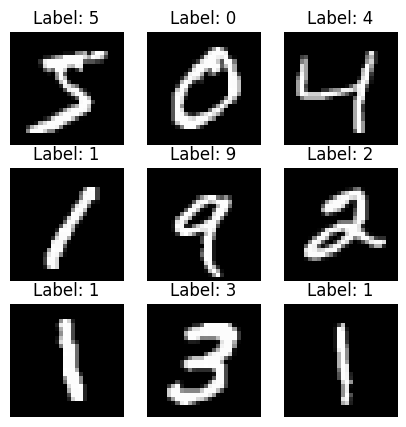

In [ ]:
# Visual Inspection
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Task 1 (10 points)
1. Perform **upsampling** on the images to 32x32
2. Show the 5 sample of the result.


Hint: You need to store the result in an empty array. Replacing data to the  **X_test** cannot be done due to the shape of the array (10000, (28,28)). You need to create an array which match with the size of the new images.

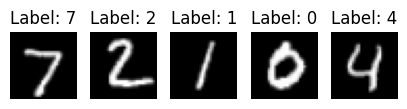

Shape of upsampled test data: (10000, 32, 32)


In [ ]:
import cv2

# Define the target size
new_size = (32, 32)

# Create an empty array to store the upsampled images
X_test_upsampled = np.empty((X_test.shape[0], new_size[0], new_size[1]), dtype=np.float32)

# Upsample each image in the test set
for i in range(X_test.shape[0]):
    X_test_upsampled[i] = cv2.resize(X_test[i], new_size)

# Show 5 sample upsampled images
plt.figure(figsize=(5, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

print("Shape of upsampled test data:", X_test_upsampled.shape)

## Task 2 (10 points)
Perform normalization, so the pixel value will have a value in range of 0 until 1

In [ ]:
print("Before normalization")
print("Min pixel value:", np.min(X_test_upsampled))
print("Max pixel value:", np.max(X_test_upsampled))

# Normalize the pixel values to the range [0, 1] by dividing by 255
X_test_normalized = X_test_upsampled / 255.0

print("\nAfter normalization")
print("Min pixel value:", np.min(X_test_normalized))
print("Max pixel value:", np.max(X_test_normalized))

print("\nShape of normalized test data:", X_test_normalized.shape)

Before normalization
Min pixel value: 0.0
Max pixel value: 255.0

After normalization
Min pixel value: 0.0
Max pixel value: 1.0

Shape of normalized test data: (10000, 32, 32)


## Task 3 (10 points)
Transform / reshape the images into 1 dimensional array. Do it to the all images (after resizing and normalization).

Hint: You may need an empty array to store the result

In [ ]:
# Before reshape
print("Shape of normalized test data:", X_test_normalized.shape)

# Reshape the normalized images into a 1D array
X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# Display the shape of the flattened data
print("Shape of flattened test data:", X_test_flattened.shape)

Shape of normalized test data: (10000, 32, 32)
Shape of flattened test data: (10000, 1024)
